# Group Project

In [140]:
import numpy as np

In [141]:
# load the data from the file
data = np.loadtxt("Group.data.txt", skiprows=22)

In [142]:
# Extract time, radical velocity, and uncertainty columns
time = data[:, 0]
rv = data[:, 1]
rv_err =data[:, 2]

In [143]:
# print some rows to make sure it looks good
print("First 5 rows of data:")
for i in range(5):
    print(f"time: {time[i]:.2f}, rv: {rv[i]:.2f}, Uncertainty: {rv_err[i]:.2f}")

First 5 rows of data:
time: 2449676.06, rv: 131.91, Uncertainty: 4.84
time: 2449767.77, rv: 22.60, Uncertainty: 2.57
time: 2449768.83, rv: -5.49, Uncertainty: 2.68
time: 2449793.80, rv: 107.31, Uncertainty: 1.52
time: 2450056.99, rv: 116.67, Uncertainty: 1.62


In [144]:
import matplotlib.pyplot as plt 

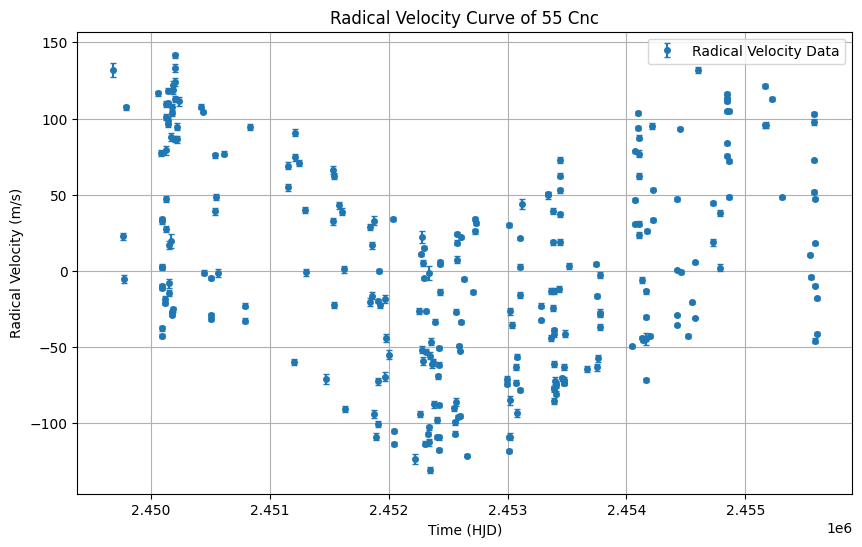

In [145]:
plt.figure(figsize=(10,6))
plt.errorbar(time, rv, yerr=rv_err, fmt="o", markersize=4, capsize=2, label= "Radical Velocity Data")
plt.xlabel("Time (HJD)")
plt.ylabel("Radical Velocity (m/s)")
plt.title("Radical Velocity Curve of 55 Cnc")
plt.legend()
plt.grid(True)
plt.savefig("55Cnc_RV_plot.pdf") 
plt.show()

In [146]:
def rv_model(t, A, f, phi, C):
    return A * np.sin(2 * np.pi * f * t + phi) + C

In [147]:
from scipy.optimize import curve_fit

In [148]:
# provide initial guesses for paramaters: amplitude, frequency, phase, offset
A_guess = (max(rv) - min(rv)) / 2
f_guess = 1 / 14 # rough guess
phi_guess = 0
C_guess = np.mean(rv)

In [149]:
initial_guess = [A_guess, f_guess, phi_guess, C_guess]

In [150]:
params, coveriance = curve_fit(rv_model, time, rv, sigma=rv_err, p0=initial_guess, absolute_sigma=True)

In [151]:
A_fit, f_fit, phi_fit, C_fit = params

In [152]:
t_fit = np.linspace(min(time), max(time), 1000)
rv_fit = rv_model(t_fit, A_fit, f_fit, phi_fit, C_fit)

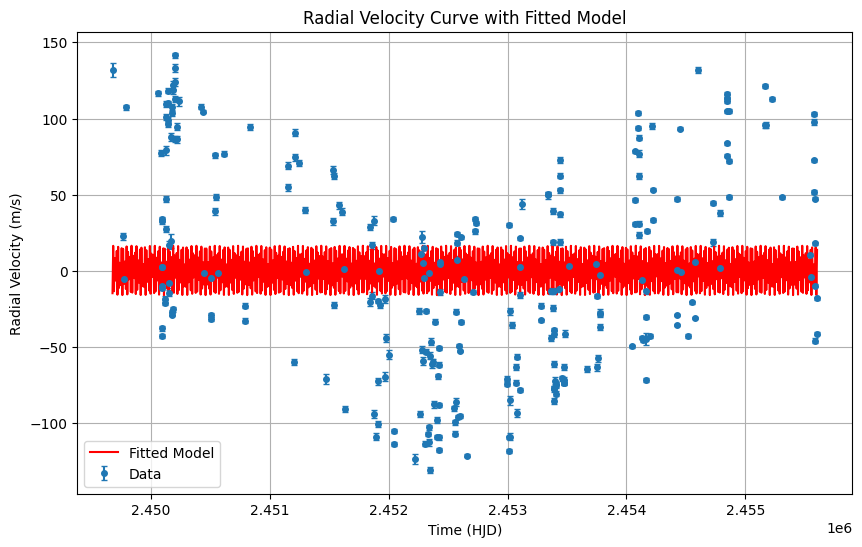

In [153]:
plt.figure(figsize=(10,6))
plt.errorbar(time, rv, yerr=rv_err, fmt="o", markersize=4, capsize=2, label="Data") #fmt is using "o" to create circles for data sheet
plt.plot(t_fit, rv_fit, "r-", label="Fitted Model")
plt.xlabel("Time (HJD)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Radial Velocity Curve with Fitted Model")
plt.legend()
plt.grid(True)
plt.savefig("55Cnc_RV_fit.pdf")
plt.show()